# Vincent
本文主要是是对Python  Vincent包的练习或者示范。

In [19]:
%matplotlib  inline
import vincent
import tushare as ts
vincent.core.initialize_notebook()  
### 在notebook 上面内嵌式画图必须进行初始化即：vincent.core.initialize_notebook()   初始化Ipython notebook display elements 
import numpy as np
barData=np.random.random(10)

dataframe=ts.get_hist_data('600848')


### Bar
柱形图用于显示一段时间内的数据辩护或显示各项之间的比较关系，抑郁比较各组数据之间的差别。延伸出堆积柱状图，可以不同类别之间组成模块之间的差别。类似功能的还要饼图，反映出了类别只是的比例关系

In [25]:
from  vincent  import AxisProperties,PropertySet,ValueRef
bar=vincent.Bar(list(barData))
bar.axis_titles("X_Axis_name","Y_Axis_name")
bar.colors(range_=["#0000CD"])
bar.legend(text_color="#ff01ccd",title="This is Legned")
ax = AxisProperties(
         labels = PropertySet(angle=ValueRef(value=30)))   # 对坐标进行旋转
bar.axes[0].properties = ax
bar.display()    ## 相当于  matplotlib 里面show()

## Chart
chart  是所有其他图表类型的基类，可以通过grammar(）函数查看你可以定制化的属性值。chart可以接受来自[不同数据源](https://vincent.readthedocs.io/en/latest/building_vega.html#keyed-list)的值，比如list，dict,series,datafram等,
而且vincent支持词云（需要自行分词，装换成vincent可以接受的格式（dict,df,series等）），支持map(稍后再讲）

以下是chart的所有参数，因为chart 是Bar,Line,Area,Scatter,StackBar,StackArea,GroupBar,Map,Pie,Word的是父类，所以有同样的参数，可以看出vincent 对pandas,numpy 完美的兼容。key_on让你可以随意选择任意特征（列）为基准，对因子进行刻画。

Parameters
        -----------
        data: Tuples, List, Dict, Pandas Series, or Pandas DataFrame
            Input data. Tuple of paired tuples, List of single values,
            dict of key/value pairs, Pandas Series/DataFrame, Numpy ndarray
        columns: list, default None
            Pandas DataFrame columns to plot.
        key_on: string, default 'idx'
            Pandas DataFrame column to key on, if not index
        iter_index: string, default None
            Pass an index key if data is a dict of multiple iterables. Ex:
            {'x': [0, 1, 2, 3, 4, 5], 'y': [6, 7, 8, 9, 10]}
        width: int, default 960
            Chart width
        height: int, default 500
            Chart height
        grouped: boolean, default False
            Pass true for grouped charts. Currently only enabled for Pandas
            DataFrames
        no_data: boolean, default False
            Pass true to indicate that data is not being passed. For example,
            this is used for the Map class, where geodata is passed as a
            separate attibute
            
每一种图形都是一个类，类中的方法就是对类的一种修饰或者是操作。
bar.axis_titles(x='Index', y='Value')  坐标轴标签
ax = AxisProperties(
         labels = PropertySet(angle=ValueRef(value=90)))   #对坐标轴上的标签进行旋转
bar.axes[0].properties = ax 
line.legend(title='Categories')  #图例
scatter.colors(brew='Set3')  Spectral,Set4······ # 颜色
stack.scales['x'].padding = 0.2   填充

In [78]:
chart=vincent.Chart(list(barData))
chart.grammar()

{u'axes': [],
 u'data': [{u'name': u'table',
   u'values': [{u'col': u'data', u'idx': 0, u'val': 0.4839016496620421},
    {u'col': u'data', u'idx': 1, u'val': 0.4512682186755492},
    {u'col': u'data', u'idx': 2, u'val': 0.18902890900670966},
    {u'col': u'data', u'idx': 3, u'val': 0.9266656669448627},
    {u'col': u'data', u'idx': 4, u'val': 0.7129054062555071},
    {u'col': u'data', u'idx': 5, u'val': 0.603076426650823},
    {u'col': u'data', u'idx': 6, u'val': 0.6353356395382439},
    {u'col': u'data', u'idx': 7, u'val': 0.7673690879058176},
    {u'col': u'data', u'idx': 8, u'val': 0.3554649795260437},
    {u'col': u'data', u'idx': 9, u'val': 0.5463723953572523}]}],
 u'height': 500,
 u'legends': [],
 u'marks': [],
 u'padding': u'auto',
 u'scales': [],
 u'width': 960}

In [88]:
chart.data[0].grammar()

{u'name': u'table',
 u'values': [{u'col': u'data', u'idx': 0, u'val': 0.4839016496620421},
  {u'col': u'data', u'idx': 1, u'val': 0.4512682186755492},
  {u'col': u'data', u'idx': 2, u'val': 0.18902890900670966},
  {u'col': u'data', u'idx': 3, u'val': 0.9266656669448627},
  {u'col': u'data', u'idx': 4, u'val': 0.7129054062555071},
  {u'col': u'data', u'idx': 5, u'val': 0.603076426650823},
  {u'col': u'data', u'idx': 6, u'val': 0.6353356395382439},
  {u'col': u'data', u'idx': 7, u'val': 0.7673690879058176},
  {u'col': u'data', u'idx': 8, u'val': 0.3554649795260437},
  {u'col': u'data', u'idx': 9, u'val': 0.5463723953572523}]}

In [97]:
import pandas as pd
list_data=[10,20,30,40,50]
dict_of_iters={"x":[0,1,2,3,4],"data":[10,20,30,40,50]}
series=pd.Series([10,20,30,40,50])
dataframe=pd.DataFrame({"data":[10,20,30,40,50]})
chart=vincent.Chart(list_data)
chart=vincent.Chart(dict_of_iters,iter_idx="x")
chart=vincent.Chart(series)
chart=vincent.Chart(dataframe)

### line

In [100]:
line=vincent.Line(list(barData))
line.display()

In [403]:
cats = ['y1', 'y2', 'y3', 'y4']
index = range(1, 21, 1)
multi_iter1 = {'index': index}
for cat in cats:
    multi_iter1[cat] = [random.randint(10, 100) for x in index]

##数据来源为字典，iter_idx 为横坐标，line图数据来源可以是list,pd.Serier,pd.DataFrame
lines=vincent.Line(multi_iter1,iter_idx="index")
lines.legend(title="Categories")
lines.axis_titles(x='Index', y='Data Value')   

### Scatter

In [135]:
scatter=vincent.Scatter(multi_iter1,iter_idx='index')
scatter.axis_titles(x='Index', y='Data Value')   ### 设置坐标轴的标签
scatter.legend(title='Categories')    ## 设置图例，只需要设置图例的名称
scatter.colors(brew='Set2')

In [205]:
df=dataframe.head(100)
data=vincent.Data.from_pandas(df)


### Area

In [406]:
area=vincent.Area(list(barData))
area

### DataFrame  画图

In [413]:
import pandas.io.data as web
df=ts.get_h_data('600848').ix[:,:4]
line = vincent.Line(df)
line.axis_titles(x='Date', y='Price')
line.legend(title='GOOG vs AAPL')


[Getting data:]####

### pd.Series  画图

In [420]:
series=vincent.Line(df['high'])
series.axes.sort()
series

### 堆积图

In [412]:
st=vincent.StackedArea(df)   # 堆积图是面积图的一种扩展
st.axis_titles(x="date",y="price")
st.legend(title="categories")
st.colors(brew="Spectral")


### 堆积柱形图
适合于数据序列不读的类别，最多不超过5个

In [409]:
checo=pd.read_csv("checo.csv",index_col=0,thousands=',')
# checo=checo.applymap(lambda x:float(x))
st=vincent.StackedBar(checo.T)
st.axis_titles(x="date",y="price")
st.legend(title="categories")
st.scales["y"].paading=1
st.colors(brew="Set2")


In [377]:
st=vincent.StackedArea(checo.T)
st.axis_titles(x="date",y="price")
st.legend(title="categories")
st.colors(brew="Set2")

In [389]:
grouped=vincent.GroupedBar(checo)
grouped.axis_titles(x="date",y="counts")
grouped.legend("中国宏观经济")   ## 完美支持中文，不像matploatlib 还得另外设置

### Pie/Donut Chart  饼图，甜甜圈

In [397]:
pie=vincent.Pie(checo)
pie.legend('Farm 1 Fruit')

In [402]:
donut=vincent.Pie(checo,inner_radius=100)
donut.colors(brew="Set2")
donut.legend('Farm 1 Fruit')

In [421]:
vincent.Scatter(df)

### 词云
word 接受字典{token,Tf}，df,tuples 输入之前需要将词频统计出来或者权重,可以vincent 完美支持中文

#### 编码调试

In [ ]:
import chardet
with  open(r"D:\学习资料\数据\诛仙.txt".decode('utf-8'),'r') as f:
    print  isinstance(f.readline(),unicode)
isinstance(u"碧瑶",unicode)

In [32]:
###这里没有对停用词进行处理
import jieba
import codecs    
from collections  import Counter
jieba.load_userdict(r"D:\学习资料\数据\dict.txt".decode('utf-8'))
jieba.add_word(u"碧瑶")
def stopword(filename = ''):

    with  codecs.open(filename,"r",'utf-8') as f:
        stops=f.read().split('\n')
        stops=[line.strip() for line in stops ]
    return stops


    
    
stops=stopword(filename = r"D:\学习资料\数据\Ch_stopList.txt".decode("utf-8"))

with  open(r"D:\学习资料\数据\诛仙.txt".decode('utf-8'),'r') as f:
    sentence=jieba.lcut(f.read().strip())
    
sentence=[line.strip() for line in sentence if line not in stops]
# 使用 add_word(word, freq=None, tag=None) 和 del_word(word) 可在程序中动态修改词典。
# 使用 suggest_freq(segment, tune=True) 可调节单个词语的词频，使其能（或不能）被分出来。
# suggest_freq(segment, tune=True) 
# del_word(word)
words=Counter(sentence)

# # words=dict(sorted(dict(words.most_common(300)).iteritems(),key=lambda x:x[1],reverse=True))
words=dict(words.most_common(1000)[2:])
word=vincent.Word(words)   
word.colors='Set4'
word.height=400
word.padding=0   ##填充


In [16]:
with  codecs.open(r"D:\学习资料\数据\诛仙.txt".decode('utf-8'),'r','utf-8') as f:
    print u"碧瑶" in jieba.lcut(f.read())


True


False


True

### 词云2
下面是一个专门做词云的包，效果明显不如vincent

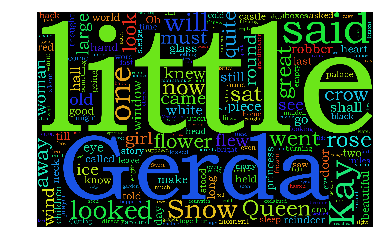

In [11]:
from wordcloud  import WordCloud
import matplotlib.pylab as plt
def wordcloudplot(txt):

    wordcloud = WordCloud(font_path='C:\Windows\Fonts\STZHONGS.ttf', 

                          background_color="black",   #可以选择black或white

                          margin=5, width=2800, height=1800) # 长宽度控制清晰程度​

    wordcloud = wordcloud.generate(txt)

    # Open a plot of the generated image.

    plt.imshow(wordcloud)

    plt.axis("off")

wordcloudplot(sentence)